<a href="https://colab.research.google.com/github/keskinyasemin/Medical-Health-Insurance-Analysis-With-Regression-Models/blob/master/MedicalHealthInsurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas  as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn as sk
plt.style.use('seaborn-whitegrid')

In [6]:
df = pd.read_csv('insurance.csv')
print(df.shape)

display(df.head())

display(df.describe())

display(df.info())

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


None

#BMI

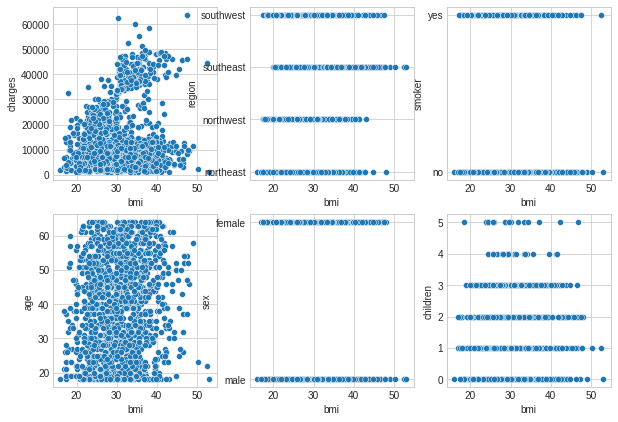

In [43]:
fig, ax = plt.subplots(2,3, figsize=(10, 7))
sns.scatterplot(data=df, x="bmi", y="charges", ax = ax[0,0])
sns.scatterplot(data=df, x="bmi", y="region", ax = ax[0,1])
sns.scatterplot(data=df, x="bmi", y="smoker", ax = ax[0,2])
sns.scatterplot(data=df, x="bmi", y="age", ax = ax[1,0])
sns.scatterplot(data=df, x="bmi", y="sex", ax = ax[1,1])
sns.scatterplot(data=df, x="bmi", y="children", ax = ax[1,2])

#Smoker vs Charges

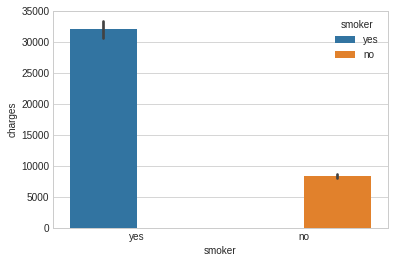

In [149]:
sns.barplot( data=df, x="smoker", y="charges", hue = 'smoker')

In [53]:
df.groupby("smoker")['charges'].mean()

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

Charges are much higher for smokers compare to non-smokers

#Smoker vs Region

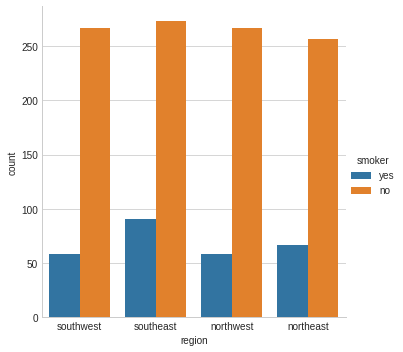

In [153]:
sns.catplot(data=df, x="region", kind="count", hue = "smoker")

non-smokers are more crowded in all regions compare to smokers

#BMI vs Sex

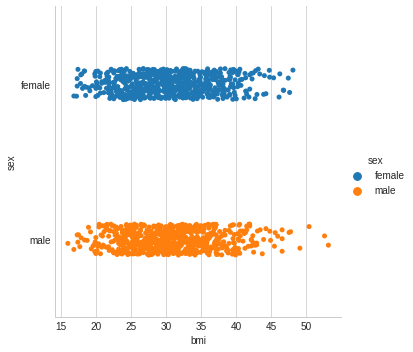

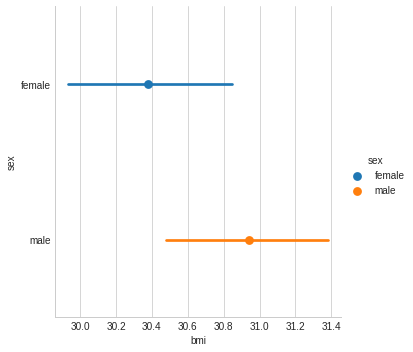

In [85]:
sns.catplot(data=df, x="bmi", kind="strip", y="sex", hue="sex")
sns.catplot(data=df, x="bmi", kind="point", y="sex", hue="sex")

As an intensity bmi values for male and female don't seem to differ much. But according to point graph male bmi is much higer than the females.

#Children vs Region

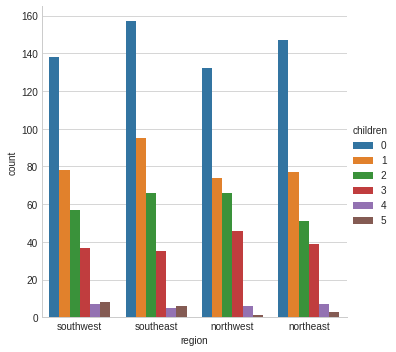

In [104]:
sns.catplot(data=df, x="region", kind="count", hue = "children")

In [109]:
display(df.groupby('region')[["children"]].sum())
display(df.groupby('region')[["children"]].sum().idxmax())

,children
region,
northeast,339
northwest,373
southeast,382
southwest,371


children    southeast
dtype: object

Southeast has more children compare to other regions.

#Age vs BMI

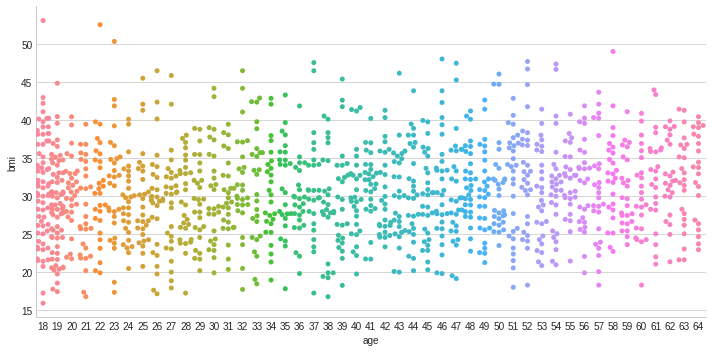

In [124]:
import warnings
warnings.filterwarnings('ignore')

sns.catplot(data=df, x="age", kind="swarm", y = "bmi", height=5, aspect=2)

In [125]:
display(df[["age","bmi"]].corr())

,age,bmi
age,1.000000,0.109272
bmi,0.109272,1.000000


The correlation between age and bmi is 0.109 which is a low value.

#BMI vs Children

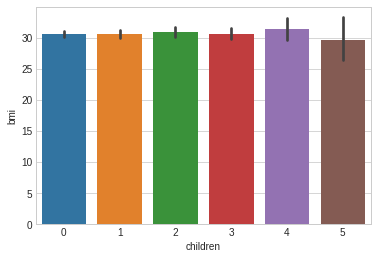

In [130]:
sns.barplot(data=df, x="children",y="bmi")

In [131]:
df.groupby('children')[["bmi"]].mean().mean()

bmi    30.63868
dtype: float64

Childrens Bmi average is around 30.639. Their age doesn't have much effect to Bmi.

#BMI vs Children

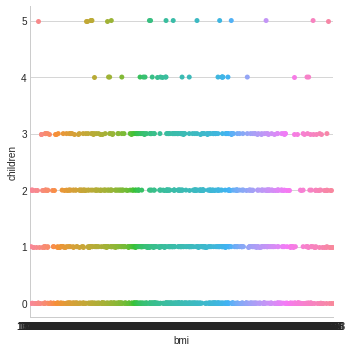

In [144]:
sns.catplot(data=df, x="bmi",kind="swarm",y="children")

In [142]:
df.groupby('bmi')[["children"]].mean()

,children
bmi,
15.960,0.000000
16.815,1.500000
17.195,2.000000
17.290,1.333333
17.385,1.000000
...,...
48.070,2.000000
49.060,0.000000
50.380,1.000000


#BMI Outlier

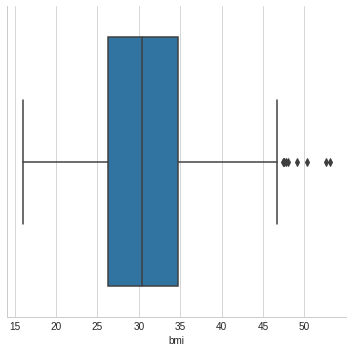

In [145]:
sns.catplot(data=df, x="bmi",kind="box")

Yes, Bmi has outliners

#Bmi vs Charges

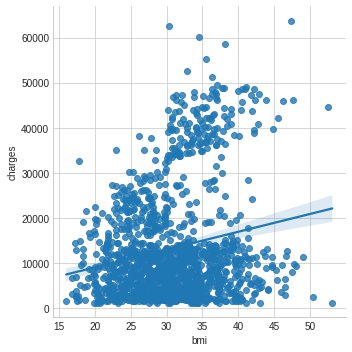

In [146]:
sns.lmplot(data=df,x='bmi',y='charges')

#region smoker bmi

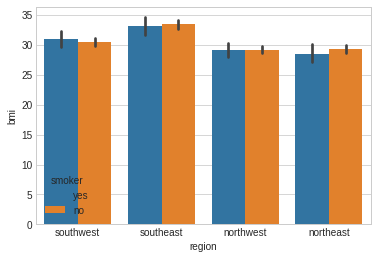

In [156]:
sns.barplot(data=df, x="region", y="bmi", hue="smoker")

In [165]:
df.groupby('region')[["bmi"]].mean().mean()

bmi    30.581473
dtype: float64

On average, regions have 30.58 Bmi. And smoker or non-smoker doesn't effect bmi value greatly as much as regions.

#Preparing the model

sex and smoker only have 2 variables which can be changed to 0 and 1.

In [8]:
from sklearn.preprocessing import LabelEncoder

lbe = LabelEncoder()
df["sex_lb"] = lbe.fit_transform(df['sex'])
df["smoker_lb"] = lbe.fit_transform(df['smoker'])

In [17]:
df.drop(columns = ["sex", "smoker"], axis=1, inplace=True)

region can be turn into integer with one-hot coding

In [12]:
df = pd.get_dummies(df, columns = ["region"], prefix = ["region"])

In [18]:
df

,age,bmi,children,charges,sex_lb,smoker_lb,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,0,1
1,18,33.770,1,1725.55230,1,0,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,0,1,0
3,33,22.705,0,21984.47061,1,0,0,1,0,0
4,32,28.880,0,3866.85520,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,1,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,0,1


In [14]:
labels = ['age','bmi','children','charges','sex_lb',"smoker_lb",'region_northeast','region_northwest','region_southeast','region_southwest']

In [19]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

df = preprocessing.normalize(df)
df = pd.DataFrame(df, columns=labels)
x = df.drop("charges",axis=1)
y = df['charges']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

Model Selection

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

linear = LinearRegression().fit(x_train,y_train)
knn = KNeighborsRegressor().fit(x_train, y_train)
rf = RandomForestRegressor().fit(x_train,y_train)

In [31]:
models = [linear, knn, rf]
for i in models:
    cross = cross_val_score(i, x_train, y_train, cv = 10, scoring='neg_mean_squared_error')
    print(f"{i} {cross.mean()}")

LinearRegression() -5.341293416531108e-10
KNeighborsRegressor() -3.031658194572866e-10
RandomForestRegressor() -1.8850890666158774e-10


I choose  RandomForestRegressor because its mse is much lower than the other models

In [41]:
from sklearn.model_selection import GridSearchCV

param_grid = {  'bootstrap': [True], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'], 'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}
rf_model = GridSearchCV(rf, param_grid, cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)
rf_model.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=1,
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, None],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]},
             return_train_score=True)

In [42]:
rf_model.best_params_

{'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 5}

In [43]:
rf_model.best_score_

0.9832500458377487

In [47]:
#tuned_params = {'bootstrap': [True], 'max_depth': [10], 'max_features': ['auto'], 'n_estimators': [5]}

rf_tuned = RandomForestRegressor(bootstrap=True,max_depth=10,max_features='auto',n_estimators=5).fit(x_train,y_train)

In [48]:
from sklearn.metrics import mean_squared_error

y_pred = rf_tuned.predict(x_test)
mean_squared_error(y_test,y_pred)

2.1699773370570967e-11